In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans



In [2]:
#load data and print 5 values
cus = pd.read_csv('Mall_Customers.csv')
cus.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cus.shape

(200, 5)

In [4]:
#checking null values
#cus.info()
cus.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#choosing parameters Annual income and Spending scores
X = cus.iloc[:,[3,4]].values

In [6]:
#choosing clusters 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init='k-means++',random_state=39)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

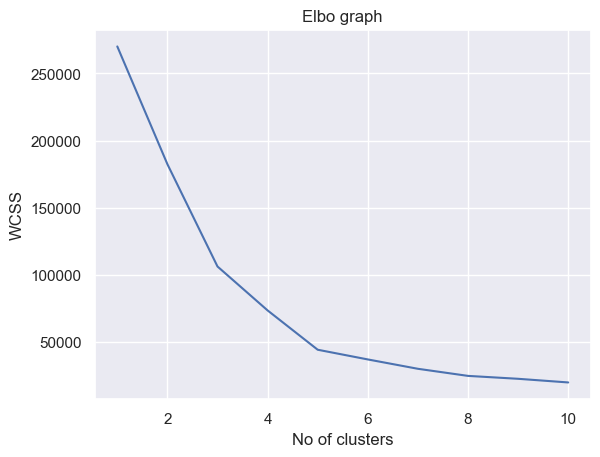

In [7]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbo graph")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=26)
#set a clusters points to the values
Y=kmeans.fit_predict(X)
print(Y)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


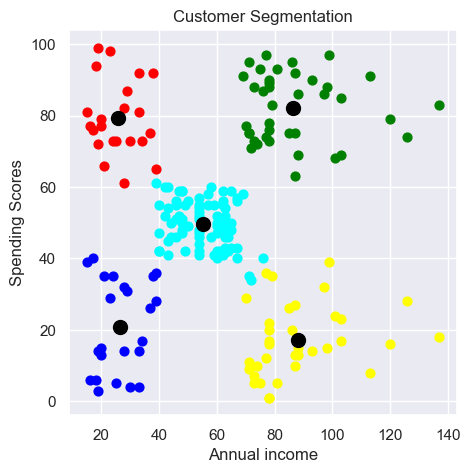

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0] , X[Y== 0,1],c='red', s=40 , label="cluster1")
plt.scatter(X[Y==1,0] , X[Y== 1,1],c='green', s=40 , label="cluster2")
plt.scatter(X[Y==2,0] , X[Y== 2,1],c='blue', s=40 , label="cluster3")
plt.scatter(X[Y==3,0] , X[Y== 3,1],c='yellow', s=40 , label="cluster4")
plt.scatter(X[Y==4,0] , X[Y== 4,1],c='cyan', s=40 , label="cluster5")
 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s=100, c='black' ,label='centroid')
plt.xlabel('Annual income')
plt.ylabel('Spending Scores')
plt.title('Customer Segmentation')
plt.show()